# Swish Analytics: A Deep Dive into NBA Statistics
<hr>

### Table of Contents
1. [Introduction](#1-introduction)
2. [Data Exploration](#2-data-exploration)
3. [Finding Patterns](#3-finding-patterns)
4. Anomaly Detection
5. Analyzing Trends
6. Conclusions

## 1. Introduction

<p style="text-indent: 25px;">
As a passionate NBA fan and a budding data scientist, the intersection of sports and analytics is an exciting new frontier for me. Since basketball is competitve by nature, there's been a culture of comparison in NBA fandom for as long as it's existed. We've been asking the same burning questions about the greatest players of all time, greatest franchises, greaters roster, where the game has been and where it's headed. This project is an attempt at taking a statistical and scientific approach to a select few questions I've curated.This project is based on the <a href="https://www.kaggle.com/datasets/justinas/nba-players-data">NBA Players dataset</a> and the goal is to use statistical analysis methods to answer intriguing questions while exploring NBA player data over the years. It is worth noting that the dataset records player data from the 1996-97 season to the 2022-23 season, and therefore doesn't include information from later seasons including the current (2023-24) season. 
</p>

## 2. Data Exploration

### 2.1 Overview of Totals

In [55]:
import pandas as pd

df = pd.read_csv("./dataset/all_seasons.csv")
df.head()

,num,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [56]:
unique_count = lambda col: len(df[col].unique())

unique_counts = pd.DataFrame({
    'Num of Players': [unique_count('player_name')],
    'Num of Teams': [unique_count('team_abbreviation')],
    'Num of Seasons': [unique_count('season')],
    'Num of Colleges': [unique_count('college')],
    'Num of Countries': [unique_count('country')],
    'Num of Draft Classes': [unique_count('draft_year')]
})

display(unique_counts)

,Num of Players,Num of Teams,Num of Seasons,Num of Colleges,Num of Countries,Num of Draft Classes
0,2551,36,27,357,82,48


### 2.1 The Average NBA Player

In [57]:
df.describe()

,num,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,6421.500000,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,3707.887763,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3210.750000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,6421.500000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,9632.250000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,12843.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000



The average NBA player can be described as a player aged $27$ years old, who played $51$ games per season, averaging $8.2$ points per game, $3.6$ rebounds per game, and $2$ assists per game on $0.5\%$ true shooting and with a net rating 
of $-2.2$. 

### 2.2 Distributions

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

to_words = lambda s: " ".join([ i.capitalize() for i in s.split('_') ])

def show_distribution(col):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=20, color='skyblue')
    plt.title(f'Distribution of {to_words(col)}')
    plt.xlabel(to_words(col))
    plt.ylabel('Frequency')
    plt.show()

#### 2.2.1 Age In A Season

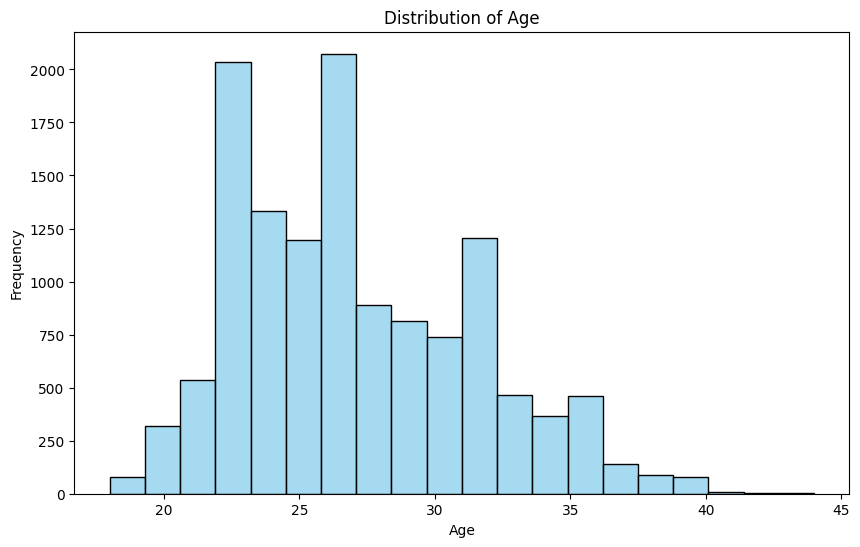

In [59]:
show_distribution('age')

#### 2.2.2 Height 

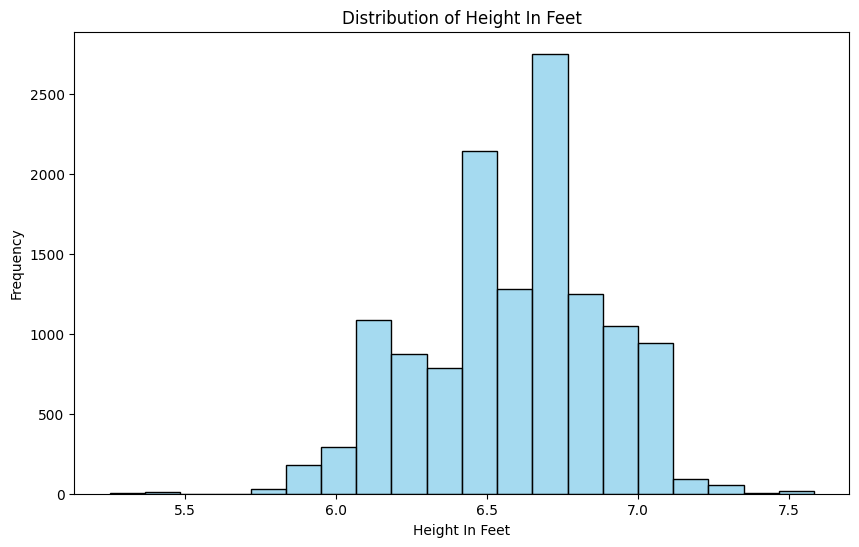

In [60]:
df['height_in_feet'] = df['player_height'] * 0.0328084  # 1 centimeter = 0.0328084 feet

show_distribution('height_in_feet')

#### 2.2.3 Points Per Game

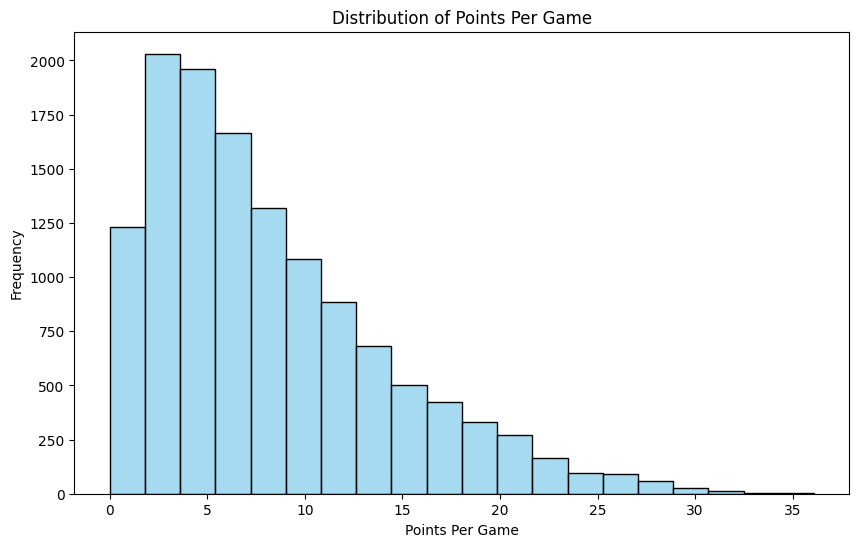

In [61]:
df['points_per_game'] = df['pts']

show_distribution('points_per_game')

#### 2.2.4 Rebounds Per Game

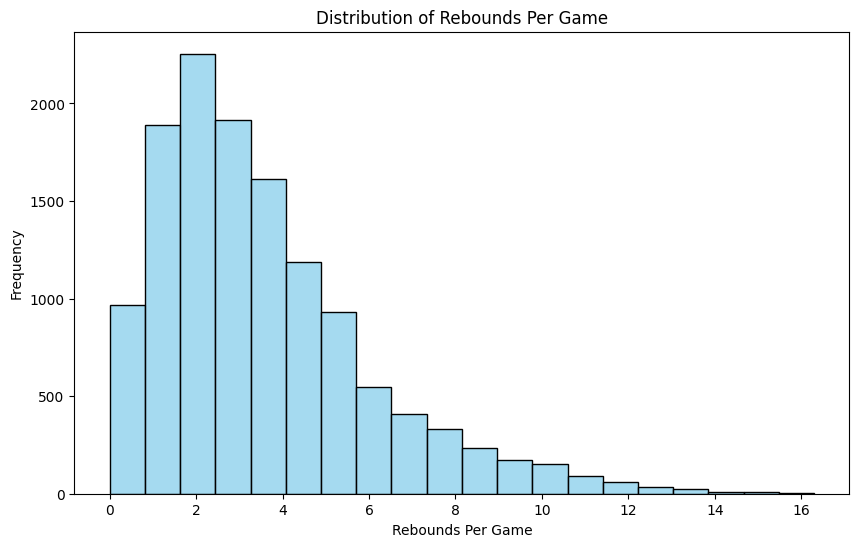

In [62]:
df['rebounds_per_game'] = df['reb']

show_distribution('rebounds_per_game')

#### 2.2.5 Assists Per Game

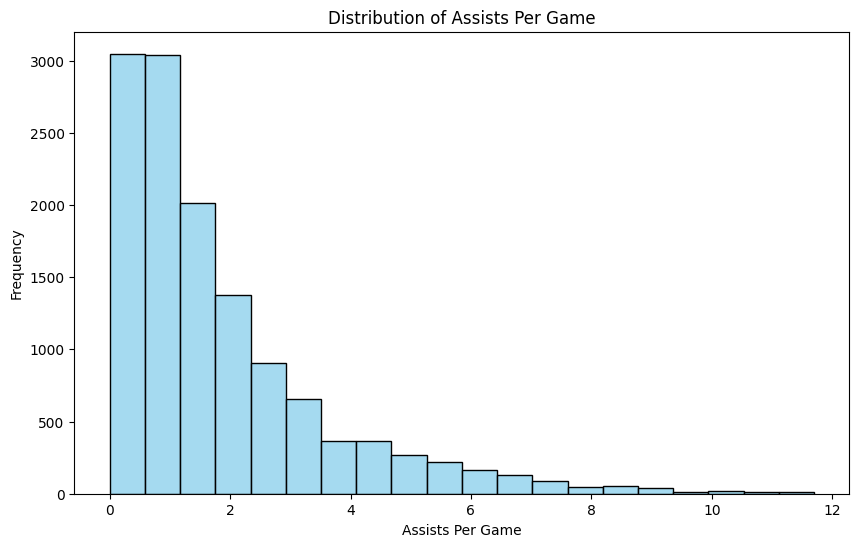

In [63]:
df['assists_per_game'] = df['ast']

show_distribution('assists_per_game')

### 2.3 Most Common Characteristics

In [64]:
def most_common(col, title):
    plt.figure(figsize=(12, 8))

    unique_players = df.drop_duplicates(subset='player_name')
    counts = unique_players[col].value_counts().head(5)

    ax = sns.barplot(x=counts.index, y=counts.values, palette='Set3', hue=counts.index, legend=False)
    plt.title(title)
    plt.xlabel(to_words(col))
    plt.ylabel('Number of Players')
    plt.xticks(rotation=45, ha='right')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()
    plt.show()

#### 2.3.1 Most Common Colleges

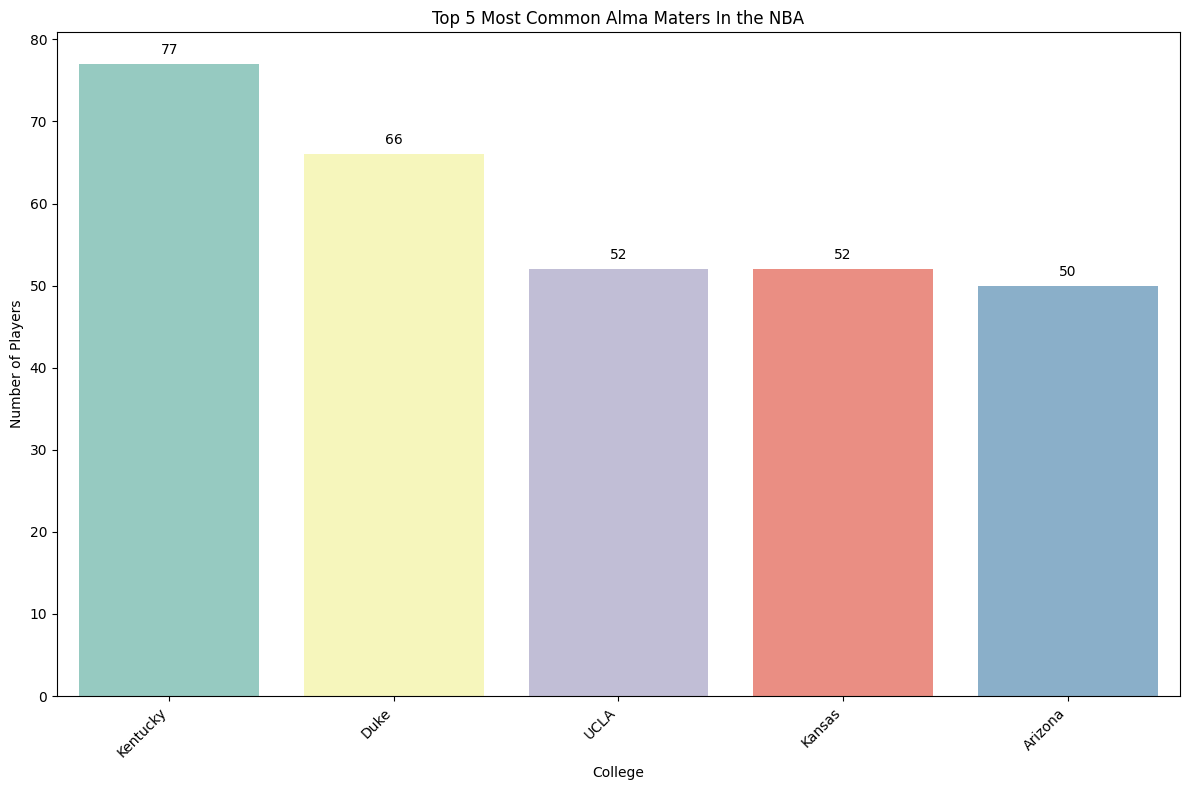

In [65]:
most_common('college', 'Top 5 Most Common Alma Maters In the NBA')

#### 2.3.2 Most Common Countries

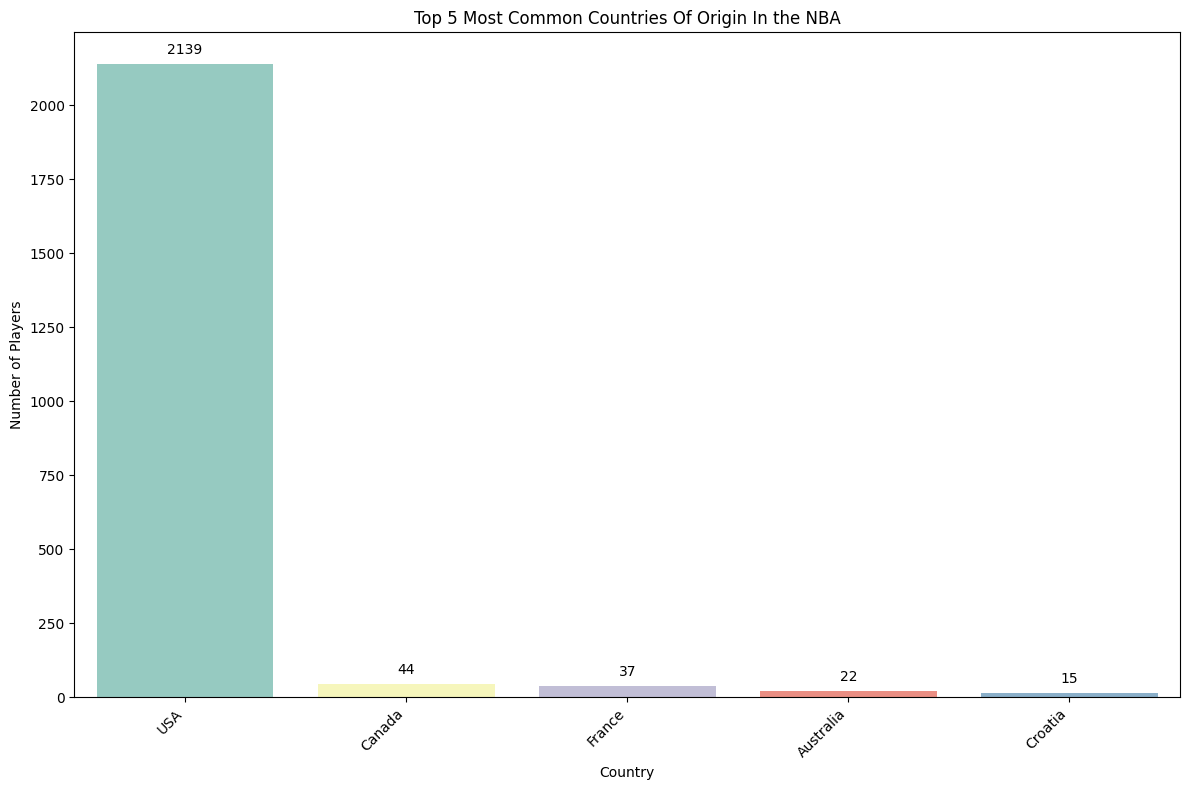

In [66]:
most_common('country', "Top 5 Most Common Countries Of Origin In the NBA")

## 3. Finding Patterns

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

player_stats = {}
for _, row in df.iterrows():
    player_name = row['player_name']
    season = row['season']

    if player_name not in player_stats:
        player_stats[player_name] = {} 

    player_stats[player_name][season] = {
        'points_per_game': row['pts'],
        'assists_per_game': row['ast'],
        'rebounds_per_game': row['reb'],
        'net_rating': row['net_rating'],
        'college': row['college'],
        'draft_number': row['draft_number']
    }

### 3.1 Correlation With Age

In [131]:
x_ind = ['pts', 'ast', 'reb', 'net_rating']
X = df[x_ind]
y = np.array(df['age']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rsq = r2_score(y_test, y_pred)

print(f'R-squared: {rsq}')

coefficients = pd.DataFrame({
    'Variable': x_ind,
    'Coefficient': model.coef_[0]
})
display(coefficients)

R-squared: 0.029080188851411948


,Variable,Coefficient
0,pts,-0.127341
1,ast,0.414353
2,reb,0.143529
3,net_rating,0.029469


The $R^2$ for this model is $\approx 0.29$, which indicates that the model explains about $29\%$ of the variablility in the outputs based on the input.

1. **Points Per Game**: -0.127
    - This coeffecient means that an increase in points per game is associated with a slight decrease in age, meaning that on average younger players tend to slighlty score more according to the model.

2. **Assists Per Game**: 0.414
    - This coeffecient means that an increase in assists per game is associated with an increase in age, meaning that on average, older players tend to get more assists per game according to the model.

3. **Rebounds Per Game**: 0.144
    - This coeffecient means that an increase in rebounds per game is associated with a small increase in age, meaning that on average, older players tend to get a little more rebounds per game according to the model.

4. **Net Rating**: 0.295
    - This coeffecient means that an increase in net rating is associated with an increase in age, meaning that on average, older players tend to get higher net ratings according to the model. 

<p style="text-indent: 25px;">
So, <b>how does the age of a player effect performance?</b> According to the model, not very significantly. The coeffecients show decent increases associated with increase in age on all but one variable, which is points. For points 
it's recorded to have a weak negative correlation with age. This leads us to believe that age does not significantly effect a player's performance in these categories. Keep in mind that this is accounting for all ages, not focusing on "old" or ages in the range for retirement. 
</p>